<a href="https://colab.research.google.com/github/little-hoge/GoogleColaboratory/blob/main/TesseractOCRTest/TesseractOCRTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Google ColabでTesseractOCRを使う方法](https://qiita.com/shoku-pan/items/7a67f484a10430da6678)

In [1]:
#Tesseract OCRの関連ライブラリーインストール
!apt install tesseract-ocr libtesseract-dev tesseract-ocr-jpn
!pip install pyocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
tesseract-ocr-jpn is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [2]:
#モジュールをインポート
from PIL import Image
import pyocr
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
# tesseractOCR設定
tools = pyocr.get_available_tools()
print(tools)
# [<module 'pyocr.tesseract' from '/usr/local/lib/python3.6/dist-packages/pyocr/tesseract.py'>, 
# <module 'pyocr.libtesseract' from '/usr/local/lib/python3.6/dist-packages/pyocr/libtesseract/__init__.py'>]
tool = tools[0]
print(tool.get_name())
# Tesseract (sh)

[<module 'pyocr.tesseract' from '/usr/local/lib/python3.7/dist-packages/pyocr/tesseract.py'>, <module 'pyocr.libtesseract' from '/usr/local/lib/python3.7/dist-packages/pyocr/libtesseract/__init__.py'>]
Tesseract (sh)


Saving MessageJapanese.png to MessageJapanese (1).png


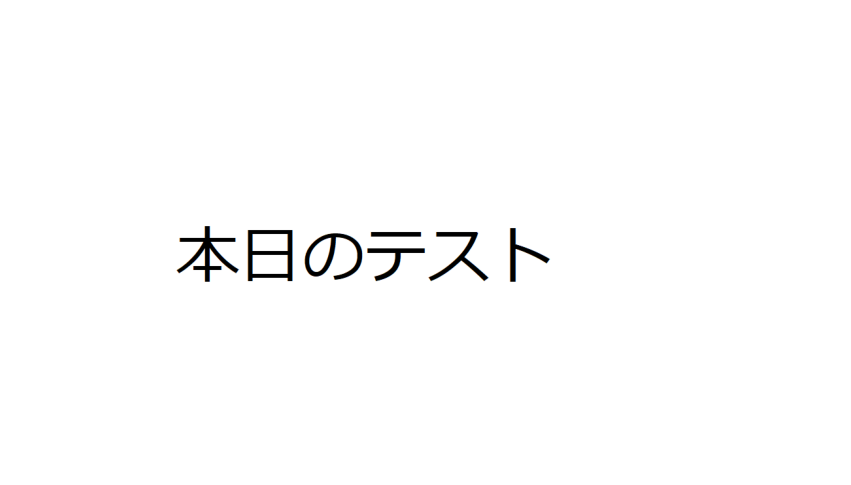

In [4]:
#OCRを行う画像を読み込み
from google.colab import files
files  = files.upload()

#読み込んだ画像のファイル名
filename = list(files)[0]

#読み込んだ画像を表示
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(img)

In [5]:
#抽出文字表示
txt1 = tool.image_to_string(
    Image.open(filename),
    lang='jpn+eng',
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)

print(txt1)

本日のテスト


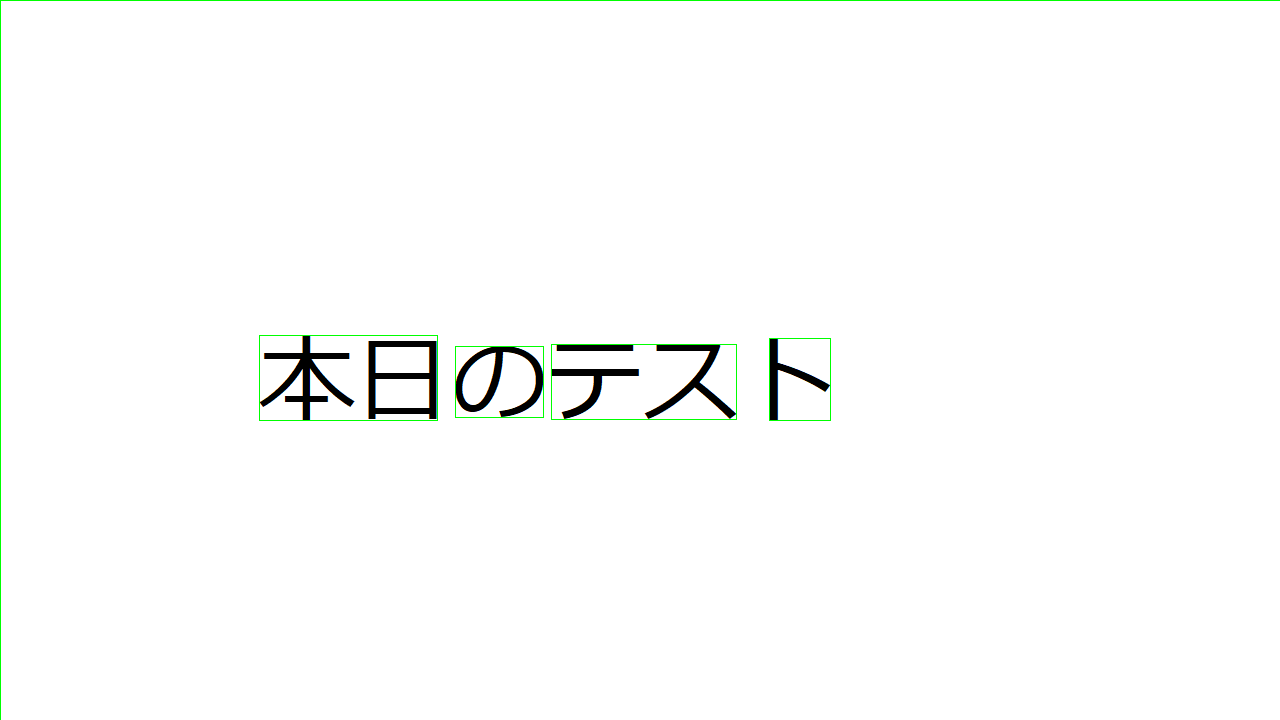

In [6]:
results = tool.image_to_string(
    Image.open(filename),
    lang='jpn+eng',
    builder=pyocr.builders.WordBoxBuilder(tesseract_layout=6)
)

draw_rectangle = cv2.imread(filename)

for box in results:
    cv2.rectangle(draw_rectangle, box.position[0], box.position[1], (0, 255, 0), 1)
cv2.imwrite('draw_rectangle.png', draw_rectangle)
draw_rectangle = Image.open('draw_rectangle.png')
draw_rectangle